In [1]:
# Third party modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
from math import sqrt

In [2]:
print("Welcome to the LEGO to DOT converter")

Welcome to the LEGO to DOT converter


In [3]:
# Set the paramets for the script here
lego_colors_path = "lego_colors_extended - colors.csv" # Source file for LEGO colors
#image_name = "test_image.png"
#image_name = "IMG_5102.jpg"
#image_name = "map.png"
image_name = "trex.jpeg" #image to load
lego_pieces_allowed = 10000
color_selection = 'manual_selection'
open_original = False

In [4]:
# Get image functions
def get_image(image_path, lego_parts = 10000, open_original = True):
    """Load and resize an image (and open it)"""
    image = Image.open(image_path, "r")

    # Open the orginal image on the screen
    if open_original:
        image.show()
    
    # Display the image before downslampling
    plt.imshow(image)
    plt.show()
    width, height = image.size
    scaling_factor = sqrt(lego_parts/(width*height))
    
    # Resize the image
    # For refrence, Lego Map has 11695 parts
    if scaling_factor < 1:
        print("Rescaled image by " + str(round(scaling_factor,3)))
        print("Size before resizing: " +str(width)+ " x "+str(height)+ " (Pixels: "+str(width*height)+")")        
        #image = image.resize((200,200))
        image = image.resize((int(width*scaling_factor),int(height*scaling_factor)))
        width, height = image.size
        print("Size after resizing: " +str(width)+ " x "+str(height) + " (Pixels: "+str(width*height)+")")        
    elif scaling_factor > 1:
        print("Scaling factor needs to be <1. We did not rescale the image")

    # Display the image after downslampling
    plt.imshow(image)
    plt.show()
    
    return image

def extract_image(image):
    """Get a numpy array of an image so that one can access values[x][y]."""
    # extract data from the image
    pixel_values = list(image.getdata())
    if image.mode == "RGB":
        channels = 3
    elif image.mode == "RGBA":
        channels = 4
    elif image.mode == "L":
        channels = 1
    else:
        print("Unknown mode: %s" % image.mode)
        return None
    pixel_values = np.array(pixel_values)
    return pixel_values

In [5]:
# Load Lego colors
colors = pd.read_csv(lego_colors_path)
colors

,id,name,rgb,is_trans,is_for_sale,known_colors,map_colors,manual_selection
0,0,Black,05131D,f,t,f,NaN,t
1,1,Blue,0055BF,f,t,t,NaN,NaN
2,2,Green,237841,f,t,f,NaN,NaN
3,3,Dark Turquoise,008F9B,f,t,t,t,NaN
4,4,Red,C91A09,f,t,t,NaN,NaN
...,...,...,...,...,...,...,...,...
185,1060,Trans-Green Opal,84B68D,t,f,f,NaN,NaN
186,1061,Trans-Dark Blue Opal,0020A0,t,f,f,NaN,NaN
187,9999,Light Nougat,FFC995,f,t,t,NaN,NaN
188,9998,Medium Nougat,AA7D55,f,t,t,NaN,NaN


In [6]:
# Split colors into RBG components
colors['R'] = colors['rgb'].str.slice(0,2).apply(int,base=16)
colors['G'] = colors['rgb'].str.slice(2,4).apply(int,base=16)
colors['B'] = colors['rgb'].str.slice(4,6).apply(int,base=16)
colors

,id,name,rgb,is_trans,is_for_sale,known_colors,map_colors,manual_selection,R,G,B
0,0,Black,05131D,f,t,f,NaN,t,5,19,29
1,1,Blue,0055BF,f,t,t,NaN,NaN,0,85,191
2,2,Green,237841,f,t,f,NaN,NaN,35,120,65
3,3,Dark Turquoise,008F9B,f,t,t,t,NaN,0,143,155
4,4,Red,C91A09,f,t,t,NaN,NaN,201,26,9
...,...,...,...,...,...,...,...,...,...,...,...
185,1060,Trans-Green Opal,84B68D,t,f,f,NaN,NaN,132,182,141
186,1061,Trans-Dark Blue Opal,0020A0,t,f,f,NaN,NaN,0,32,160
187,9999,Light Nougat,FFC995,f,t,t,NaN,NaN,255,201,149
188,9998,Medium Nougat,AA7D55,f,t,t,NaN,NaN,170,125,85


In [7]:
colors

,id,name,rgb,is_trans,is_for_sale,known_colors,map_colors,manual_selection,R,G,B
0,0,Black,05131D,f,t,f,NaN,t,5,19,29
1,1,Blue,0055BF,f,t,t,NaN,NaN,0,85,191
2,2,Green,237841,f,t,f,NaN,NaN,35,120,65
3,3,Dark Turquoise,008F9B,f,t,t,t,NaN,0,143,155
4,4,Red,C91A09,f,t,t,NaN,NaN,201,26,9
...,...,...,...,...,...,...,...,...,...,...,...
185,1060,Trans-Green Opal,84B68D,t,f,f,NaN,NaN,132,182,141
186,1061,Trans-Dark Blue Opal,0020A0,t,f,f,NaN,NaN,0,32,160
187,9999,Light Nougat,FFC995,f,t,t,NaN,NaN,255,201,149
188,9998,Medium Nougat,AA7D55,f,t,t,NaN,NaN,170,125,85


Loading: trex.jpeg


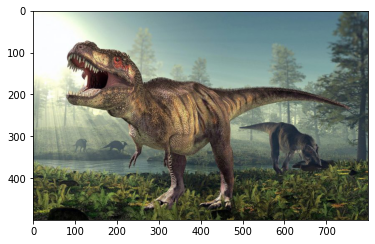

Rescaled image by 0.158
Size before resizing: 800 x 500 (Pixels: 400000)
Size after resizing: 126 x 79 (Pixels: 9954)


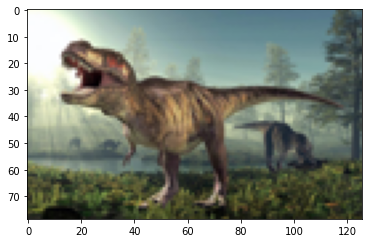

In [8]:
# Load an image
print("Loading: "+image_name)
image_rescaled = get_image(image_name,lego_pieces_allowed, open_original)

In [9]:
# convert 
image_pixels = extract_image(image_rescaled)
image_pixels

array([[252, 254, 240],
       [252, 254, 240],
       [252, 254, 240],
       ...,
       [ 53,  55,  28],
       [ 50,  49,  23],
       [ 49,  50,  27]])

In [10]:
# Process the data frame
imgf = pd.DataFrame(image_pixels).iloc[:,:3] # Drop extra channels for PNG
imgf.columns = ['R','G','B']

# Add value column to serve as key
imgf['value'] = imgf.R.map(str) + "-" + imgf.G.map(str) + "-" + imgf.B.map(str)
imgf

,R,G,B,value
0,252,254,240,252-254-240
1,252,254,240,252-254-240
2,252,254,240,252-254-240
3,252,254,240,252-254-240
4,251,253,239,251-253-239
...,...,...,...,...
9949,83,85,41,83-85-41
9950,37,44,23,37-44-23
9951,53,55,28,53-55-28
9952,50,49,23,50-49-23


In [11]:
# Get count of uniques value (faster computation down the road)
imgfc = imgf.value_counts().to_frame('counts').reset_index(drop=False)

In [12]:
imgfc

,R,G,B,value,counts
0,252,253,255,252-253-255,161
1,253,254,255,253-254-255,43
2,101,140,147,101-140-147,23
3,84,119,138,84-119-138,20
4,85,120,139,85-120-139,19
...,...,...,...,...,...
8544,77,92,82,77-92-82,1
8545,77,92,50,77-92-50,1
8546,77,91,92,77-91-92,1
8547,77,91,91,77-91-91,1


In [13]:
# Get closest lego color for a given RGB combination

def get_lego_color(r,g,b, colors):
    """Get the closest lego color."""
    best_match_index = 0
    best_dist = 10000000000000
    for index, row in colors.iterrows():
        abs_dist = sqrt(abs(row['R']-r)**2+abs(row['G']-g)**2+abs(row['B']-b)**2)
        if abs_dist < best_dist:
            best_match_index = index
            best_dist = abs_dist
    return best_match_index, best_dist

In [14]:
# Go through the image summary and find the closest colors

def get_picture_lego_colors(image_df, colors, color_type = 'is_for_sale'):
    """Get the closest colors for a picture"""
    if color_type == 'is_for_sale':
        colors_short = colors[colors['is_for_sale'] == 't'] 
    elif color_type == 'known_colors':    
        colors_short = colors[colors['known_colors'] == 't'] 
    elif color_type == 'map_colors':
        colors_short = colors[colors['map_colors'] == 't'] 
    elif color_type == 'manual_selection':
        colors_short = colors[colors['manual_selection'] == 't'] 
    else:
        print("Unknown type of colors. Using all LEGO colors.")
        colors_short = colors
            
    matched_colors = []
    matched_R = []
    matched_G = []
    matched_B = []
    for index, row in image_df.iterrows():
        best_color_index, best_dist = get_lego_color(row['R'],row['G'],row['B'],colors_short)
        #print(row['value'])
        #print(colors.iloc[best_color_index]['name'])
        matched_colors.append(colors.iloc[best_color_index]['name'])
        matched_R.append(colors.iloc[best_color_index]['R'])
        matched_G.append(colors.iloc[best_color_index]['G'])
        matched_B.append(colors.iloc[best_color_index]['B'])
    image_df["lego_colors"] = matched_colors 
    image_df["lR"] = matched_R
    image_df["lG"] = matched_G
    image_df["lB"] = matched_B
    return image_df

In [15]:
img_with_colors = get_picture_lego_colors(imgfc,colors, color_selection)
img_with_colors

,R,G,B,value,counts,lego_colors,lR,lG,lB
0,252,253,255,252-253-255,161,Dark Pink,200,112,160
1,253,254,255,253-254-255,43,Dark Pink,200,112,160
2,101,140,147,101-140-147,23,Dark Pink,200,112,160
3,84,119,138,84-119-138,20,Dark Pink,200,112,160
4,85,120,139,85-120-139,19,Dark Pink,200,112,160
...,...,...,...,...,...,...,...,...,...
8544,77,92,82,77-92-82,1,Black,5,19,29
8545,77,92,50,77-92-50,1,Black,5,19,29
8546,77,91,92,77-91-92,1,Black,5,19,29
8547,77,91,91,77-91-91,1,Black,5,19,29


In [16]:
# Create simplified dictionary for color mapping
colors_dic = img_with_colors[['value','lR', 'lG', 'lB','lego_colors']].set_index('value').to_dict('index')

In [17]:
# Generate the new picture with the LEGO colors

def recolor_image(image, color_map):

    # Display the image before recoloring
    plt.imshow(image)
    plt.show()
    new_image = image.copy()
    # Recolor the image
    width, height = image.size
    for i in range(0,width):# process all pixels
        for j in range(0,height):
            data = image.getpixel((i,j))
            value_key = str(data[0])+"-"+str(data[1])+"-"+str(data[2])
            #print(color_map[value_key]['lego_colors'])
            new_image.putpixel((i,j),(color_map[value_key]['lR'], color_map[value_key]['lG'], color_map[value_key]['lB']))
    
    # Scale up the image
    new_image = new_image.resize((int(width),int(height))) 
    
    # Display the recolored imaged
    plt.imshow(new_image)
    # plt.show()
    #new_image.show()
    return new_image


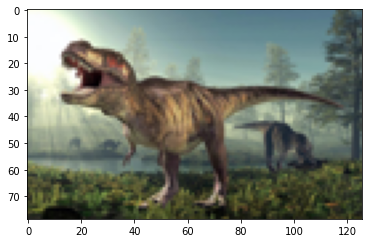

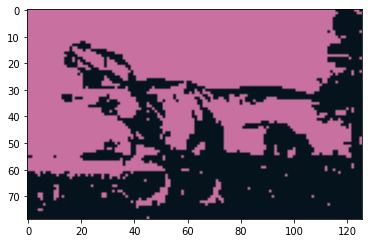

In [18]:
recolored_image = recolor_image(image_rescaled,colors_dic)

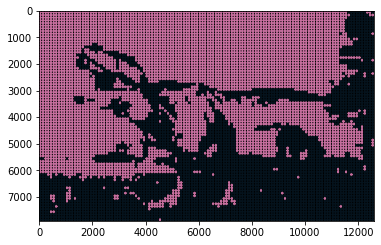

In [19]:

## Generate image with dots instead of regular pixels
def geneate_dot_image(image, background_color = (0,0,0), dot_size = 100):
    width, height = image.size
    new_img = Image.new(mode = "RGB", size=(width*dot_size, height*dot_size), color = background_color)
    img_dot = ImageDraw.Draw(new_img)
    
    # Recolor the image
    width, height = image.size
    for i in range(0,width):# process all pixels
        for j in range(0,height):
            data = image.getpixel((i,j))
            img_dot.ellipse((i*dot_size,j*dot_size,(i+1)*dot_size,(j+1)*dot_size),fill = (data[0],data[1],data[2]))    
    plt.imshow(new_img)
    new_img.show()
    

geneate_dot_image(recolored_image)

In [20]:
# Get the number of pieces of each color we will need
color_count = pd.pivot_table(img_with_colors, values = 'counts', index = ['lego_colors'], aggfunc = np.sum)
print("Number of distinct colors used: "+str(len(color_count)))      
print("Number of parts: "+str(sum(color_count['counts'])))
color_count.sort_values(by=['counts'], ascending=False)

Number of distinct colors used: 2
Number of parts: 9954


,counts
lego_colors,
Dark Pink,5605
Black,4349


In [21]:
# Todo -- do a second pass to limit the number of allowed colors